In [41]:
#Import delle librerie
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%config InlineBackend.figure_format='retina'

#Import dei dataset
broken = pd.read_csv("Broken_Final.csv")
healthly = pd.read_csv("Healthly_Final.csv")

#Unione dei dataset
data = pd.concat([broken, healthly], ignore_index=True, sort=False)

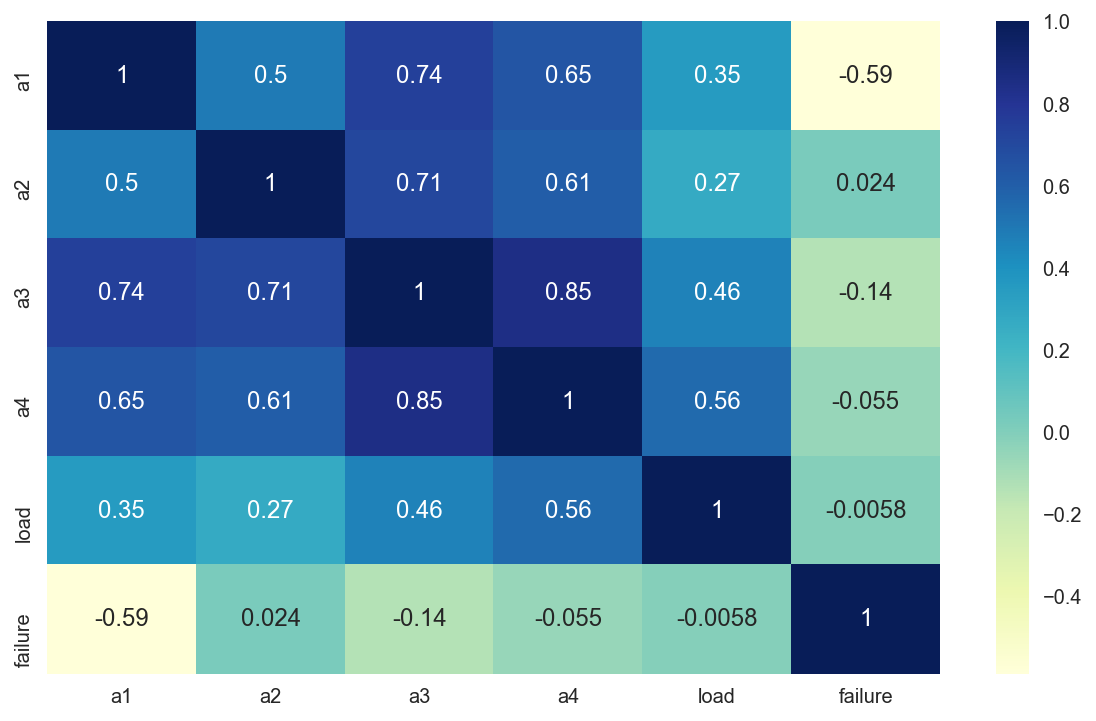

In [42]:
#Matrice di correlazione delle features
features = data.columns
corr = data[features].corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, cmap="YlGnBu", annot=True)

In [44]:
#Scalarizzazione valori dataset (per distanza euclidea)
scaler = StandardScaler()
segmentation_std = scaler.fit_transform(data)

In [45]:
#Instazione PCA per riduzione dimensionale
pca = PCA()
pca.fit(segmentation_std)

PCA()

In [46]:
#Valori PCA
pca.explained_variance_ratio_

array([0.5647423 , 0.21009496, 0.12729359, 0.05464424, 0.02531536,
       0.01790955])

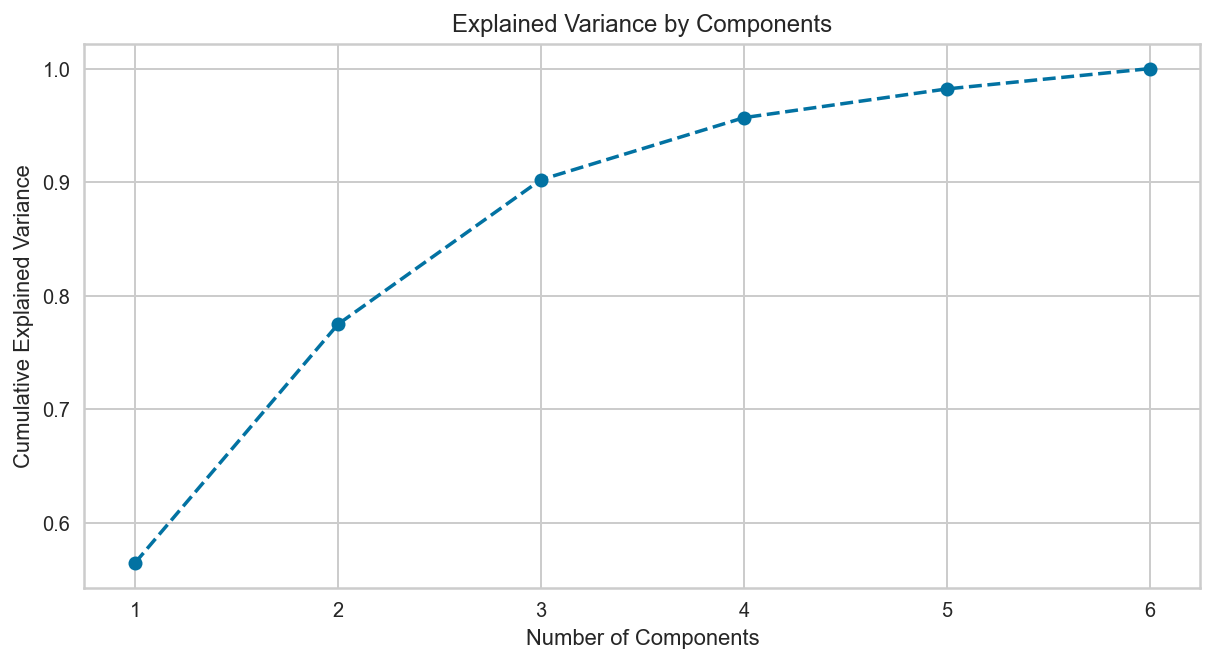

In [47]:
#Visualizzazione PCA
plt.figure(figsize=(10,5))
plt.plot(range(1,7), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title("Explained Variance by Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.show()

In [48]:
#Instanziazione PCA con 2 componenti (perchè mantengono varianza vicino 80%)
pca = PCA(n_components = 2)

In [49]:
pca.fit(segmentation_std)

PCA(n_components=2)

In [50]:
pca.transform(segmentation_std)

array([[-2.62084467,  0.52137322],
       [-2.64502398,  0.46800986],
       [-3.71710548,  0.32055362],
       ...,
       [ 3.6037205 , -0.61727971],
       [ 2.85099889, -0.71396543],
       [ 1.18095037, -0.64198886]])

In [51]:
scores_pca = pca.transform(segmentation_std)

In [52]:
#Procedura (elbow curve) per ottenere numero di cluster adatto
wcss = []
for i in range(1,8):
    kmeans_pca = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

Text(0, 0.5, 'WCSS')

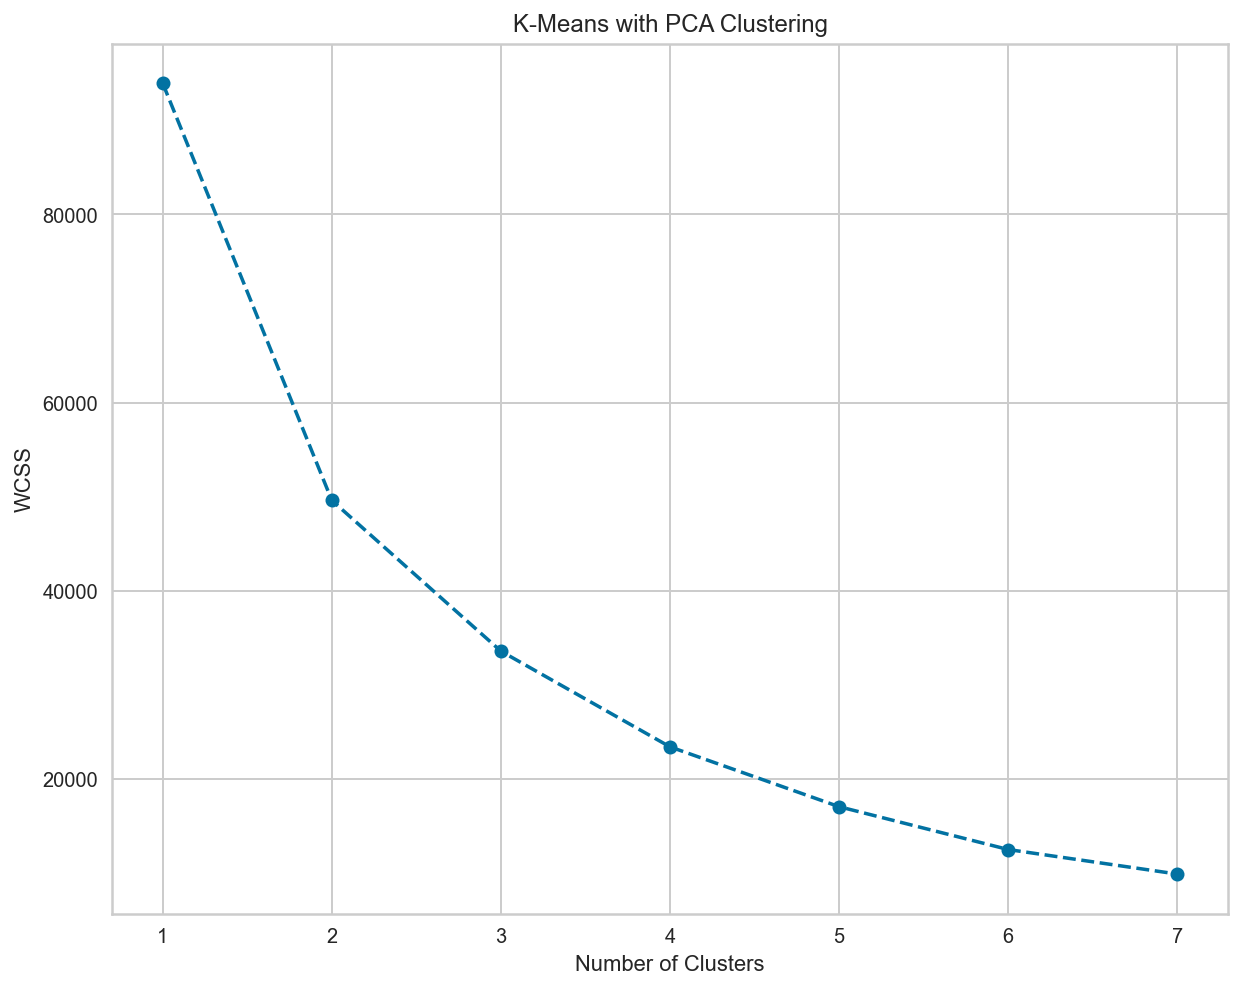

In [53]:
#Visualizzazione grafico elbow curve
plt.figure(figsize=(10,8))
plt.plot(range(1,8), wcss, marker='o', linestyle='--')
plt.title("K-Means with PCA Clustering")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")

In [54]:
#Instanziazione k-means con 2 clusters
kmeans_pca = KMeans(n_clusters=2, init='k-means++', random_state=42)
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=2, random_state=42)

In [55]:
#Unione dataset originale per valori del PCA 
df_segm_pca_kmeans = pd.concat([data.reset_index(drop=True), pd.DataFrame(scores_pca)], axis=1)
df_segm_pca_kmeans.columns.values[-2: ] = ['Component 1', 'Component 2']
#Aggiunta colonna con risultati modello KMeans
df_segm_pca_kmeans['Segment K-Means PCA'] = kmeans_pca.labels_

In [56]:
df_segm_pca_kmeans.head()

,a1,a2,a3,a4,load,failure,Component 1,Component 2,Segment K-Means PCA
0,2.773743,3.625441,3.053217,2.479670,0.0,1,-2.620845,0.521373,0
1,3.009118,3.566201,2.854556,2.597574,0.0,1,-2.645024,0.468010,0
2,2.258893,3.189251,1.971267,1.726624,0.0,1,-3.717105,0.320554,0
3,2.486789,2.758437,2.658690,2.068924,0.0,1,-3.342282,0.303225,0
4,3.245092,3.051541,2.536531,2.085758,0.0,1,-3.137223,0.218237,0


In [58]:
#Collegamento label del modello con le nostre label
df_segm_pca_kmeans["Segment K-Means PCA"] = df_segm_pca_kmeans["Segment K-Means PCA"].replace(0,2)
df_segm_pca_kmeans["Segment K-Means PCA"] = df_segm_pca_kmeans["Segment K-Means PCA"].replace(1,0)
df_segm_pca_kmeans["Segment K-Means PCA"] = df_segm_pca_kmeans["Segment K-Means PCA"].replace(2,1)
df_segm_pca_kmeans.head()

,a1,a2,a3,a4,load,failure,Component 1,Component 2,Segment K-Means PCA
0,2.773743,3.625441,3.053217,2.479670,0.0,1,-2.620845,0.521373,1
1,3.009118,3.566201,2.854556,2.597574,0.0,1,-2.645024,0.468010,1
2,2.258893,3.189251,1.971267,1.726624,0.0,1,-3.717105,0.320554,1
3,2.486789,2.758437,2.658690,2.068924,0.0,1,-3.342282,0.303225,1
4,3.245092,3.051541,2.536531,2.085758,0.0,1,-3.137223,0.218237,1


In [59]:
#Calcolo Silhoutte score
for k in range(5):
    # Instantiate the KMeans models
    km = KMeans(n_clusters=k+2)
    # Fit the KMeans model
    km.fit_predict(data)
    # Calculate Silhoutte Score
    score = silhouette_score(data, km.labels_, metric='euclidean')
    #Print the score
    print('Silhouetter Score k={}: {:.3f}'.format(k, score))

Silhouetter Score k=0: 0.628
Silhouetter Score k=1: 0.589
Silhouetter Score k=2: 0.570
Silhouetter Score k=3: 0.581
Silhouetter Score k=4: 0.547


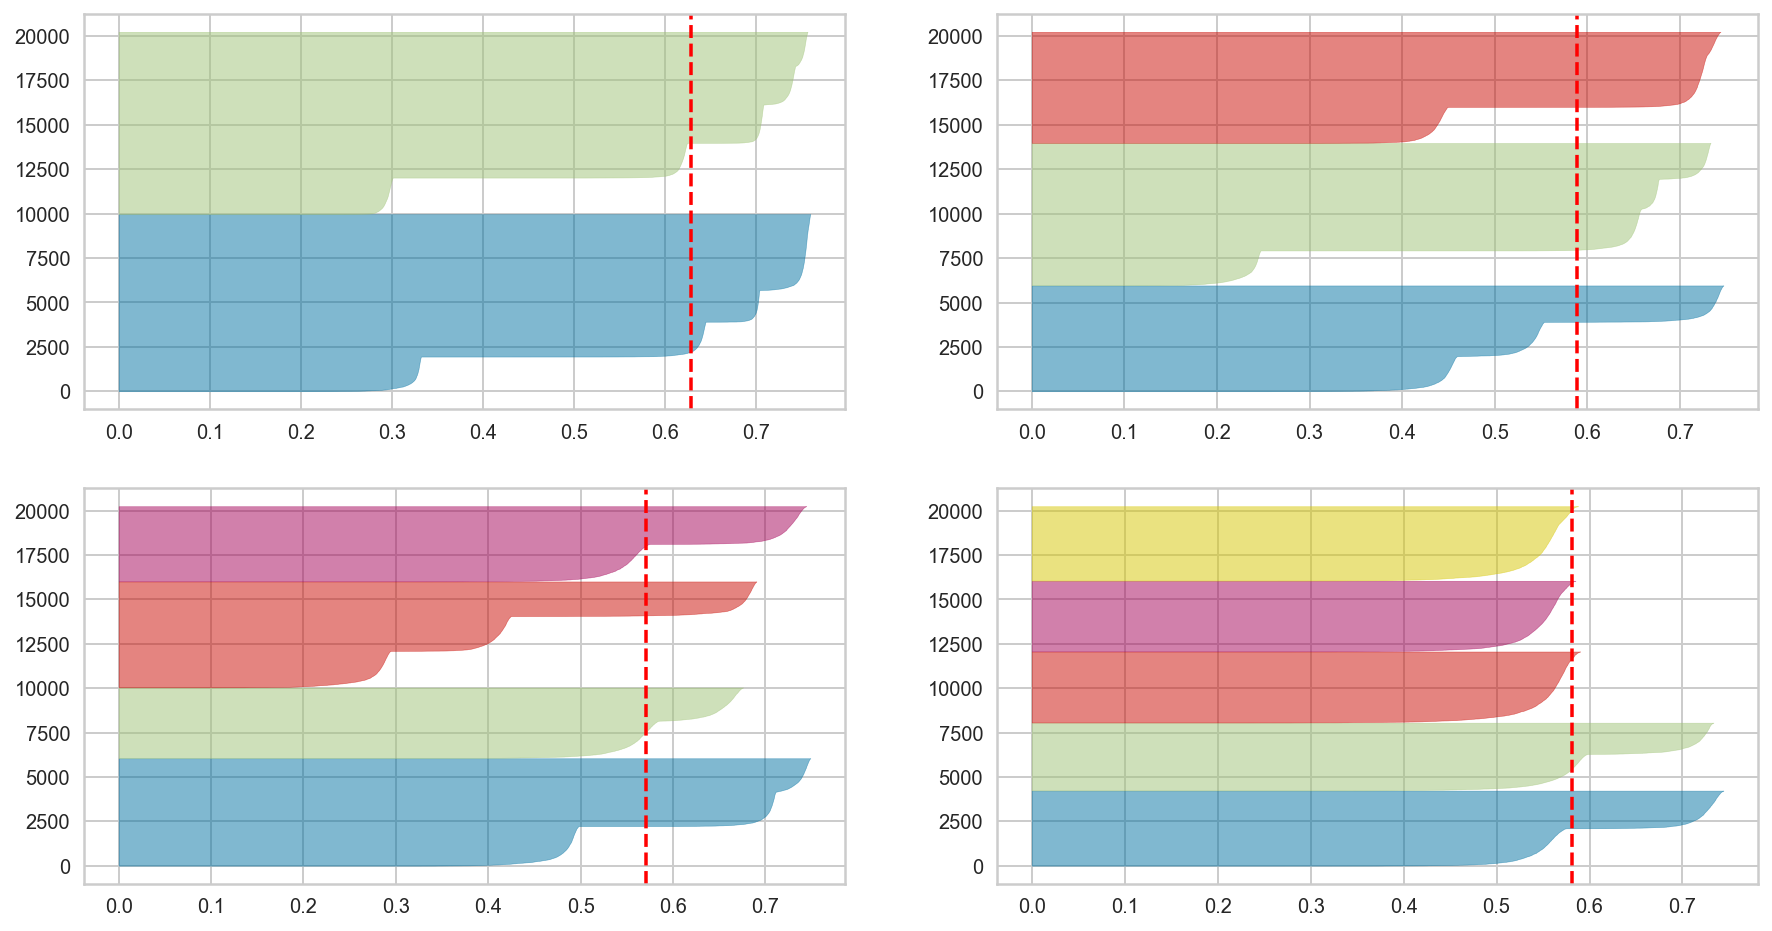

In [60]:
#Visualizzazione Silohoutte score
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(data)

In [61]:
guess = df_segm_pca_kmeans["failure"] == df_segm_pca_kmeans["Segment K-Means PCA"]
print(str(len(guess[guess == True])*100/len(guess))+'%')

59.94159283274761%
